In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
import sklearn.tree as tree
import numpy as np
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets
y_corrected = []

for i in y["income"]:
  if '<' in i:
    y_corrected.append(0)
  else:
    y_corrected.append(1)

y = pd.DataFrame()
y["income"] = y_corrected

# variable information
print(adult.variables)

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [4]:
adult_df = X.copy(deep=True)
adult_df["income"] = y

# Get rid of the entries where the occupation or workclass is unknown
adult_df = adult_df[adult_df['occupation'] != '?']
adult_df = adult_df[adult_df['workclass'] != '?']
adult_df = adult_df[adult_df['native-country'] != '?']

# Get the dummies for the columns
categorical_columns = adult_df.select_dtypes(include=['object']).columns
adult_df = pd.get_dummies(data = adult_df, columns = categorical_columns)

y = pd.DataFrame()
y = adult_df["income"]
adult_df.drop("income", axis=1, inplace=True)

# make df into numpy
X_proc = adult_df.to_numpy()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_proc, y, test_size=0.2, random_state=42)

# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gradient_booster = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Fit the model
gradient_booster.fit(X_train, y_train)

# Predict on the test set
y_pred = gradient_booster.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the Gradient Boosting classifier on test set: {:.2f}%'.format(accuracy * 100))

Accuracy of the Gradient Boosting classifier on test set: 86.83%


In [30]:
gb2 = GradientBoostingClassifier(random_state=42, learning_rate= 0.1, n_estimators= 50, max_depth=5)
gb2.fit(X_train, y_train)
y_pred = gb2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8705996339756702


In [21]:
from sklearn.ensemble import AdaBoostClassifier

ada_booster = AdaBoostClassifier(random_state=42, learning_rate=0.1, n_estimators=100,
                          estimator=tree.DecisionTreeClassifier(max_depth=4))
ada_booster.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_booster.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8752287652061578


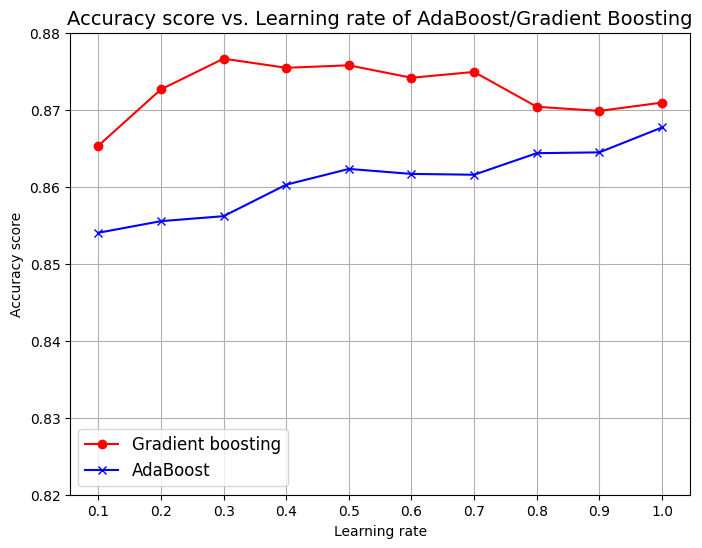

In [24]:
import matplotlib.pyplot as plt

# Stores the accuracy score
# AdaBoost
learning_rate_range = np.arange(0.1, 1.1, 0.1)
ada_accuracy = []
for lr in learning_rate_range:
    ada= AdaBoostClassifier(random_state=42, learning_rate=lr, n_estimators = 100)
    ada.fit(X_train, y_train)
    y_ada = ada.predict(X_test)
    ada_accuracy.append(accuracy_score(y_test, y_ada))

# Gradient boosting
grad_accuracy = []
for lr in learning_rate_range:
    gb= GradientBoostingClassifier(random_state=42, learning_rate=lr, n_estimators = 100)
    gb.fit(X_train, y_train)
    y_grad = gb.predict(X_test)
    grad_accuracy.append(accuracy_score(y_test, y_grad))

# AdaBoost vs. Gradient Boosting
fig = plt.figure(figsize=(8, 6))
plt.plot(learning_rate_range, grad_accuracy, c='red', label='Gradient boosting', marker='o')
plt.plot(learning_rate_range, ada_accuracy, c='blue', label='AdaBoost', marker='x')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.82, 0.88)
plt.legend(prop={'size': 12})
plt.title('Accuracy score vs. Learning rate of AdaBoost/Gradient Boosting', size=14)
plt.grid(True)
plt.show()

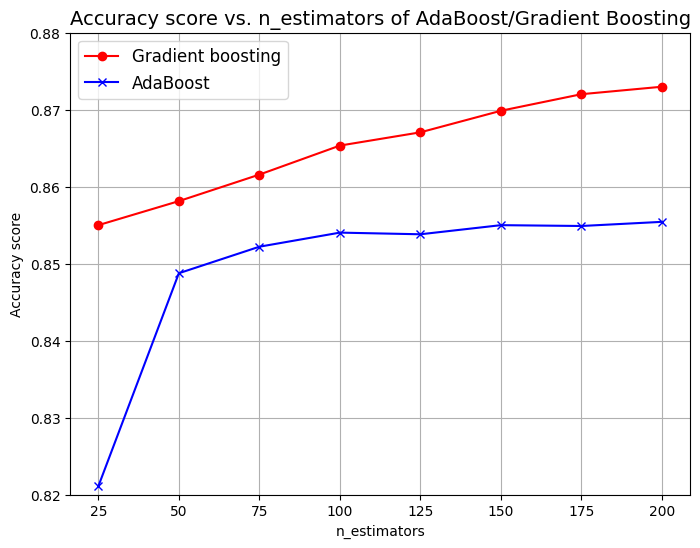

In [25]:
# Stores the accuracy score
# AdaBoost
n_estimators_range = np.arange(25, 225, 25)
# test_ada = []
# train_ada = []
ada_accuracy2 = []
for est in n_estimators_range:
    ada= AdaBoostClassifier(random_state=42, learning_rate = 0.1, n_estimators = est)
    ada.fit(X_train, y_train)
    y_ada = ada.predict(X_test)
    ada_accuracy2.append(accuracy_score(y_test, y_ada))
    # train_ada.append(ada.score(X_train, y_train))
    # test_ada.append(ada.score(X_test, y_test))

# Gradient boosting
# test_gb = []
# train_gb = []
grad_accuracy2 = []
for est in n_estimators_range:
    gb= GradientBoostingClassifier(random_state=42, learning_rate = 0.1, n_estimators = est)
    gb.fit(X_train, y_train)
    y_grad = gb.predict(X_test)
    grad_accuracy2.append(accuracy_score(y_test, y_grad))
    # train_gb.append(gb.score(X_train, y_train))
    # test_gb.append(gb.score(X_test, y_test))


# AdaBoost vs. Gradient Boosting
fig = plt.figure(figsize=(8, 6))
plt.plot(n_estimators_range, grad_accuracy2, c='red', label='Gradient boosting', marker='o')
plt.plot(n_estimators_range, ada_accuracy2, c='blue', label='AdaBoost', marker='x')
plt.xlabel('n_estimators')
plt.xticks(n_estimators_range)
plt.ylabel('Accuracy score')
plt.ylim(0.82, 0.88)
plt.legend(prop={'size': 12})
plt.title('Accuracy score vs. n_estimators of AdaBoost/Gradient Boosting', size=14)
plt.grid(True)
plt.show()

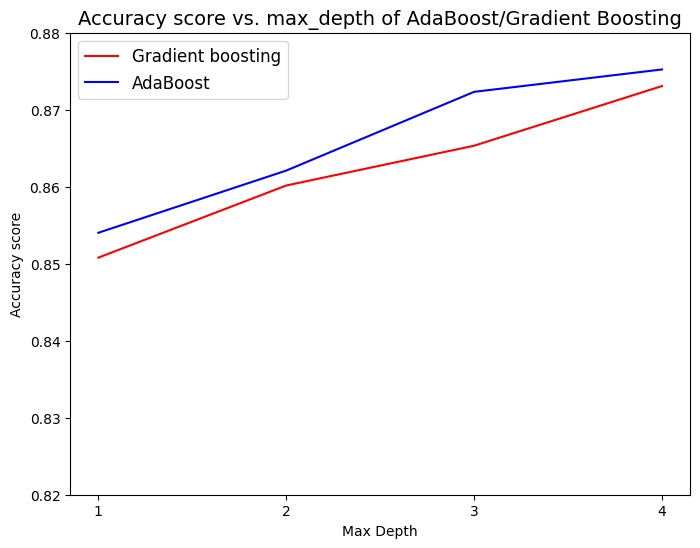

In [19]:
max_depth_range = np.arange(1, 5, 1)
# test_ada = []
# train_ada = []
ada_accuracy3 = []
for dept in max_depth_range:
    ada= AdaBoostClassifier(random_state=42, learning_rate=0.1, n_estimators=100,
                          estimator=tree.DecisionTreeClassifier(max_depth=dept))
    ada.fit(X_train, y_train)
    y_ada = ada.predict(X_test)
    ada_accuracy3.append(accuracy_score(y_test, y_ada))
    # train_ada.append(ada.score(X_train, y_train))
    # test_ada.append(ada.score(X_test, y_test))

# Gradient boosting
# test_gb = []
# train_gb = []
grad_accuracy3 = []
for dept in max_depth_range:
    gb= GradientBoostingClassifier(random_state=42, learning_rate = 0.1,
                                   n_estimators = 100, max_depth = dept)
    gb.fit(X_train, y_train)
    y_grad = gb.predict(X_test)
    grad_accuracy3.append(accuracy_score(y_test, y_grad))
    # train_gb.append(gb.score(X_train, y_train))
    # test_gb.append(gb.score(X_test, y_test))


# AdaBoost vs. Gradient Boosting
fig = plt.figure(figsize=(8, 6))
plt.plot(max_depth_range, grad_accuracy3, c='red', label='Gradient boosting')
plt.plot(max_depth_range, ada_accuracy3, c='blue', label='AdaBoost')
plt.xlabel('Max Depth')
plt.xticks(max_depth_range)
plt.ylabel('Accuracy score')
plt.ylim(0.82, 0.88)
plt.legend(prop={'size': 12})
plt.title('Accuracy score vs. max_depth of AdaBoost/Gradient Boosting', size=14)
plt.show()

In [ ]:
# X_train_red = X_train[:20000, :]
# y_train_red = y_train[:20000]

lr = [0.01, 0.1, 1]
est = [50, 100, 150]
# md = [1, 3, 5]

for l in lr:
  for e in est:
    # for m in md:
    gb = GradientBoostingClassifier(random_state=42, learning_rate=l, n_estimators=e)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"learning rate: {l}, estimator: {e} => accuracy: {accuracy}")

learning rate: 0.01, estimator: 50 => accuracy: 0.8003014318010551
learning rate: 0.01, estimator: 100 => accuracy: 0.8451932393153192
learning rate: 0.01, estimator: 150 => accuracy: 0.8479922488965443
learning rate: 0.1, estimator: 50 => accuracy: 0.8581117450748197
learning rate: 0.1, estimator: 100 => accuracy: 0.8653245774572075
learning rate: 0.1, estimator: 150 => accuracy: 0.8698460544730326
learning rate: 1, estimator: 50 => accuracy: 0.8738292604155453
learning rate: 1, estimator: 100 => accuracy: 0.8709225966196577
learning rate: 1, estimator: 150 => accuracy: 0.86672408224782


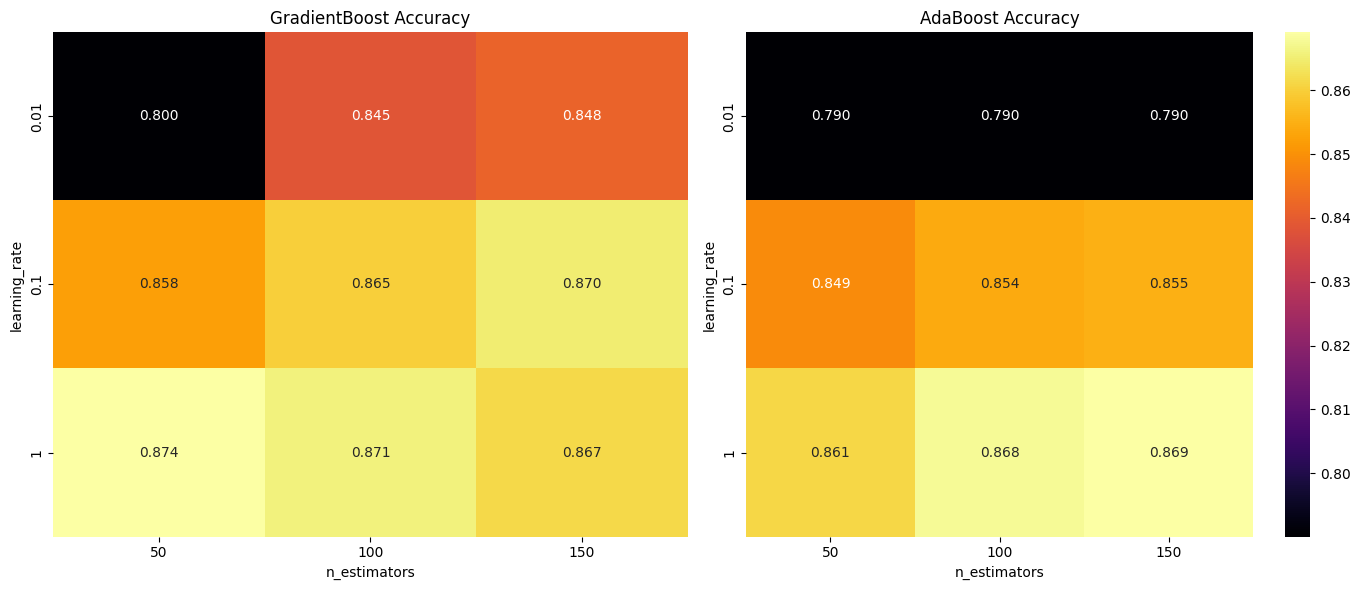

In [27]:
import seaborn as sns

# Define the parameter ranges
learning_rates = [0.01, 0.1, 1]
n_estimators_range = [50, 100, 150]

# Initialize matrices to store the accuracies for each combination of learning rate and n_estimators
gradient_boost_matrix = np.zeros((len(learning_rates), len(n_estimators_range)))
ada_boost_matrix = np.zeros((len(learning_rates), len(n_estimators_range)))

# Loop over the ranges of learning rates and n_estimators to calculate accuracies
for i, learning_rate in enumerate(learning_rates):
    for j, n_estimators in enumerate(n_estimators_range):
        # GradientBoost
        gb_clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
        gb_clf.fit(X_train, y_train)
        y_pred_gb = gb_clf.predict(X_test)
        gradient_boost_matrix[i, j] = accuracy_score(y_test, y_pred_gb)

        # AdaBoost
        ab_clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
        ab_clf.fit(X_train, y_train)
        y_pred_ab = ab_clf.predict(X_test)
        ada_boost_matrix[i, j] = accuracy_score(y_test, y_pred_ab)

# Create heatmaps
plt.figure(figsize=(14, 6))

# GradientBoost heatmap
plt.subplot(1, 2, 1)
sns.heatmap(gradient_boost_matrix, annot=True, fmt='.3f', xticklabels=n_estimators_range, yticklabels=learning_rates, cmap='inferno', cbar=False)
plt.title('GradientBoost Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('learning_rate')

# AdaBoost heatmap
plt.subplot(1, 2, 2)
sns.heatmap(ada_boost_matrix, annot=True, fmt='.3f', xticklabels=n_estimators_range, yticklabels=learning_rates, cmap='inferno', cbar=True)
plt.title('AdaBoost Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('learning_rate')

plt.tight_layout()
plt.show()